In [1]:
import os
import pathlib
import urllib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from IPython import display

seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

In [2]:
DATASET_PATH = 'data/mini_speech_commands'

data_dir = pathlib.Path(DATASET_PATH)

tf.keras.utils.get_file(
    'speech.zip',
    origin = 'http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip',
    extract = True,
    cache_dir=',', cache_subdir= 'data'
)

'/tmp\\.keras\\data\\speech.zip'

In [3]:
class_names = os.listdir("C:/tmp/.keras/data/mini_speech_commands")
class_names

['down', 'go', 'left', 'no', 'README.md', 'right', 'stop', 'up', 'yes']

In [4]:
class_names = [w for w in class_names if w != 'README.md']
print('class_names:', class_names)

class_names: ['down', 'go', 'left', 'no', 'right', 'stop', 'up', 'yes']


In [5]:
import glob
filenames = glob.glob("C:/tmp/.keras/data/mini_speech_commands" + "/*/*")
filenames

['C:/tmp/.keras/data/mini_speech_commands\\down\\004ae714_nohash_0.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\00b01445_nohash_1.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\00f0204f_nohash_0.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\0132a06d_nohash_1.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\0132a06d_nohash_4.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\0137b3f4_nohash_2.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\014f9f65_nohash_0.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\016e2c6d_nohash_0.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\016e2c6d_nohash_2.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\01b4757a_nohash_0.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\01bb6a2a_nohash_1.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\01bb6a2a_nohash_3.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\01d22d03_nohash_0.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\02

In [6]:
# 마지막 10개 파일확인
filenames[-10:]

['C:/tmp/.keras/data/mini_speech_commands\\yes\\fd395b74_nohash_1.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\yes\\fd395b74_nohash_2.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\yes\\fd395b74_nohash_3.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\yes\\fde2dee7_nohash_0.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\yes\\fde2dee7_nohash_1.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\yes\\fe1916ba_nohash_1.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\yes\\fe5c4a7a_nohash_0.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\yes\\ff21fb59_nohash_0.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\yes\\ffd2ba2f_nohash_0.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\yes\\ffd2ba2f_nohash_2.wav']

In [7]:
# 앞에서 10개 파일확인
filenames[:10]

['C:/tmp/.keras/data/mini_speech_commands\\down\\004ae714_nohash_0.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\00b01445_nohash_1.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\00f0204f_nohash_0.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\0132a06d_nohash_1.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\0132a06d_nohash_4.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\0137b3f4_nohash_2.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\014f9f65_nohash_0.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\016e2c6d_nohash_0.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\016e2c6d_nohash_2.wav',
 'C:/tmp/.keras/data/mini_speech_commands\\down\\01b4757a_nohash_0.wav']

In [8]:
# 리스트 랜덤 shuffle
filenames = tf.random.shuffle(filenames)
filenames[:10]

<tf.Tensor: shape=(10,), dtype=string, numpy=
array([b'C:/tmp/.keras/data/mini_speech_commands\\up\\b7a6f709_nohash_0.wav',
       b'C:/tmp/.keras/data/mini_speech_commands\\go\\e7ea8b76_nohash_7.wav',
       b'C:/tmp/.keras/data/mini_speech_commands\\up\\f33660af_nohash_1.wav',
       b'C:/tmp/.keras/data/mini_speech_commands\\go\\726382d6_nohash_0.wav',
       b'C:/tmp/.keras/data/mini_speech_commands\\down\\462e1919_nohash_0.wav',
       b'C:/tmp/.keras/data/mini_speech_commands\\left\\24ed94ab_nohash_0.wav',
       b'C:/tmp/.keras/data/mini_speech_commands\\up\\bbb2eb5b_nohash_1.wav',
       b'C:/tmp/.keras/data/mini_speech_commands\\left\\8dd24423_nohash_1.wav',
       b'C:/tmp/.keras/data/mini_speech_commands\\no\\b97c9f77_nohash_2.wav',
       b'C:/tmp/.keras/data/mini_speech_commands\\yes\\2275edbb_nohash_0.wav'],
      dtype=object)>

In [9]:
print('Number of total examples:', len(filenames))
print('Number of examples per label:',
      len(tf.io.gfile.listdir(str(data_dir/class_names[0]))))
print('Example file tensor:', filenames[0])

Number of total examples: 8000
Number of examples per label: 1000
Example file tensor: tf.Tensor(b'C:/tmp/.keras/data/mini_speech_commands\\up\\b7a6f709_nohash_0.wav', shape=(), dtype=string)


In [10]:
# 데이터 확보
dir_path = 'C:/tmp/.keras/data/mini_speech_commands'
for dirname in class_names:
    target = dir_path + f"/{dirname}"
    print(f"{dirname}'s count = {len(os.listdir(target))}")

down's count = 1000
go's count = 1000
left's count = 1000
no's count = 1000
right's count = 1000
stop's count = 1000
up's count = 1000
yes's count = 1000


In [11]:
# 데이터 분할 8:1:1로 분할  >>  훈련 : 검증 : 테스트
train_files = filenames[:6400]
val_files = filenames[6400: 6400 + 800]
test_files = filenames[-800:]

print('Training set size', len(train_files))
print('Validation set size', len(val_files))
print('Test set size', len(test_files))

Training set size 6400
Validation set size 800
Test set size 800


In [12]:
len(train_files), len(val_files), len(test_files), len(filenames)

(6400, 800, 800, 8000)

In [13]:
# 오디오 파일을 수치 데이터로 변경하기
# 오디오 : 초당 샘플링 --> 시계열 데이터 --> LSTM


file = tf.io.read_file('C:/tmp/.keras/data/mini_speech_commands/down/00b01445_nohash_1.wav')
audio, _ = tf.audio.decode_wav(contents=file)
audio.shape

TensorShape([16000, 1])

In [14]:
audio[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.00161743], dtype=float32)>

In [15]:
print(tf.squeeze(audio).shape)
print(tf.squeeze(audio)[0])

(16000,)
tf.Tensor(0.0016174316, shape=(), dtype=float32)


In [16]:
# 디렉토리명을 레이블정보로 취득

In [17]:
# raw데이터인 WAV 오디오 파일을 수치 데이터로 전처리하는 함수
def decode_audio(audio_binary):
    audio, _ = tf.audio.decode_wav(contents=audio_binary)
    return tf.squeeze(audio, axis=-1)  

In [18]:
# 레이블을 생성하는 함수
def get_label(file_path):
    parts = tf.strings.split(
        input=file_path,
        sep=os.path.sep
    )
    return parts[-2]

In [19]:
a = tf.strings.split(input='C:\tmp\.keras\data\mini_speech_commands\down\00b01445_nohash_1.wav', sep=os.path.sep)
a
# 구분자를 /로 할 경우 /같은 문자로 인식하기에
# 파일불러올때와는 다르게 \로 해주었음
# a[-2]

<tf.Tensor: shape=(5,), dtype=string, numpy=
array([b'C:\tmp', b'.keras', b'data', b'mini_speech_commands',
       b'down\x00b01445_nohash_1.wav'], dtype=object)>

In [20]:
#오디오 데이터와 라벨을 하나로 묶는 함수
def get_waveform_and_label(file_path):
    label = get_label(file_path)
    audio_binary = tf.io.read_file(file_path)
    waveform = decode_audio(audio_binary)
    return waveform, label

In [21]:
# get_waveform_and_label을 이용해서 훈련셋을 만든다
files_ds = tf.data.Dataset.from_tensor_slices(train_files)
waveform_ds = files_ds.map(
    map_func=get_waveform_and_label,
    num_parallel_calls=tf.data.AUTOTUNE
); waveform_ds

# files_ds.take(0)
# files_ds.take(9)
# waveform_ds.take(9)

<ParallelMapDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.string, name=None))>

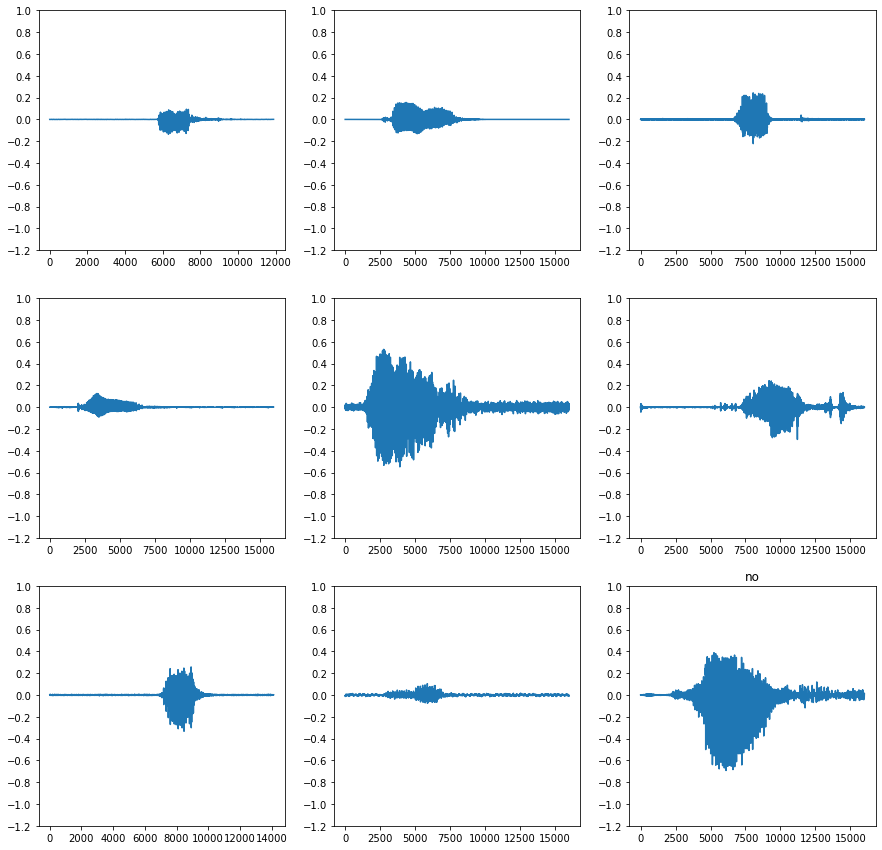

In [22]:
# 오디오 파형 시각화
rows = 3
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

for i, (audio, label) in enumerate(waveform_ds.take(n)):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    ax.plot(audio.numpy())
    ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
    label = label.numpy().decode('utf-8')
ax.set_title(label)

plt.show()

In [23]:
# 파형의 스펙트럼 변경
# 16,000 sample 16kHz 보다 작은 오디오 데이터는 zero-padding을 적용
# 시간영역 신호 끝에 0을 추가하여 길이를 늘리는 작업
def get_spectrogram(waveform):
    input_len = 16000
    waveform = waveform[:input_len]
    zero_padding = tf.zeros(
      [16000] - tf.shape(waveform),
      dtype=tf.float32)
    waveform = tf.cast(waveform, dtype=tf.float32)
    equal_length = tf.concat([waveform, zero_padding], 0)
    spectrogram = tf.signal.stft(
      equal_length, frame_length=255, frame_step=128)
    spectrogram = tf.abs(spectrogram)
    spectrogram = spectrogram[..., tf.newaxis]
    return spectrogram

In [24]:
# 데이터 탐색, 파형과 스펙트럼의 모양을 print하고 원본 오디오를 재생
for waveform, label in waveform_ds.take(1):
    label = label.numpy().decode('utf-8')
    spectrogram = get_spectrogram(waveform)

print('Label:', label)
print('Waveform shape:', waveform.shape)
print('Spectrogram shape:', spectrogram.shape)
print('Audio playback')
display.display(display.Audio(waveform, rate=16000))

Label: up
Waveform shape: (11889,)
Spectrogram shape: (124, 129, 1)
Audio playback


In [25]:
# 스펙트럼 표시 함수
def plot_spectrogram(spectrogram, ax):
    if len(spectrogram.shape) > 2:
        spectrogram = np.squeeze(spectrogram, axis = -1)
    log_spec = np.log(spectrogram.T+np.finfo(float).eps)
    height = log_spec.shape[0]
    width = log_spec.shape[1]
    X = np.linspace(0,np.size(spectrogram), num = width, dtype=int)
    Y = range(height)
    ax.pcolormesh(X,Y,log_spec)

C:\Users\user\AppData\Local\Temp/ipykernel_7548/558935533.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(X,Y,log_spec)


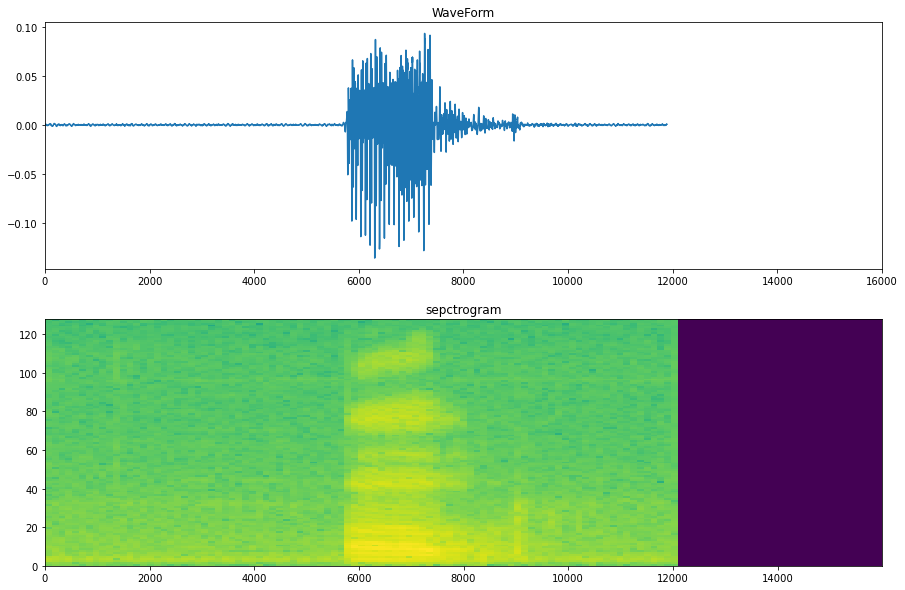

In [26]:
fig,ax = plt.subplots(2,1,figsize=(15,10))
timescale = np.arange(waveform.shape[0])
ax[0].plot(timescale, waveform.numpy())
ax[0].set_title('WaveForm')
ax[0].set_xlim([0,16000])

plot_spectrogram(spectrogram.numpy(), ax[1])
ax[1].set_title('sepctrogram')
plt.show()

In [27]:
# 데이터를 스펙트럼으로 변환하고 레이블을 id로 하는 데이터 셋
commands = class_names  # 맨 위의 class_names

def get_spectrogram_and_label_id(audio,label):
    spectrogram = get_spectrogram(audio)
    label_id = tf.argmax(label == commands)
    return spectrogram, label_id

In [28]:
spectrogram_ds = waveform_ds.map(
    map_func = get_spectrogram_and_label_id,
    num_parallel_calls=tf.data.AUTOTUNE
)

C:\Users\user\AppData\Local\Temp/ipykernel_7548/558935533.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(X,Y,log_spec)


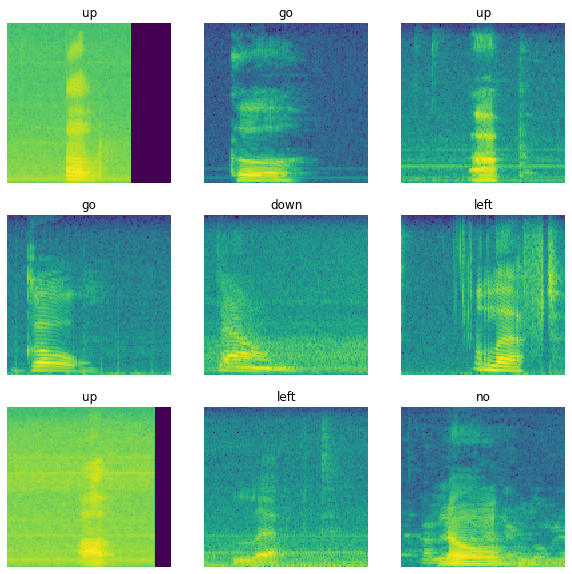

In [29]:
rows, cols = 3,3
n = rows*cols
fig,ax = plt.subplots(rows,cols,figsize=(10,10))
for i, (spectrogram, label_id) in enumerate(spectrogram_ds.take(n)):
    plot_spectrogram(spectrogram.numpy(),ax[i//cols, i%cols])
    ax[i//cols, i%cols].set_title(commands[label_id.numpy()])
    ax[i//cols, i%cols].axis('off')
plt.show()

In [30]:
# 모델을 빌드하고 학습 : 전처리
def preprocess_dataset(files):
    files_ds = tf.data.Dataset.from_tensor_slices(files)
    output_ds = files_ds.map(
      map_func=get_waveform_and_label,
      num_parallel_calls=tf.data.AUTOTUNE)
    output_ds = output_ds.map(
      map_func=get_spectrogram_and_label_id,
      num_parallel_calls=tf.data.AUTOTUNE)
    return output_ds

In [31]:
train_ds = spectrogram_ds
val_ds = preprocess_dataset(val_files)
test_ds = preprocess_dataset(test_files)

In [32]:
# 하이퍼 파라미터
batch_size = 64
train_ds = train_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)

In [33]:
# cache 기능을 추가하여 모델훈련시간을 줄여줌
# 모델을 훈련할 때 동시에 읽기 작업도 병행
train_ds = train_ds.cache().prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(tf.data.AUTOTUNE)

In [34]:
# CNN을 사용
# Resizing : 모델이 빠르게 학습할 수 있도록 입력을 다운샘플링
# Normalization : 평균과 표준편차를 기반으로 정규화

In [35]:
for spectrogram, _ in spectrogram_ds.take(1):
    input_shape = spectrogram.shape
input_shape

TensorShape([124, 129, 1])

In [36]:
num_labels = len(commands)
num_labels

8

In [37]:
norm_layer = layers.Normalization()
norm_layer.adapt(data=spectrogram_ds.map(map_func=lambda spec, label : spec))

In [38]:
model = models.Sequential(
    [
        layers.Input(shape = input_shape),
        layers.Resizing(32,32),
        norm_layer,
        layers.Conv2D(32,3, activation = 'relu'),
        layers.Conv2D(64,3, activation = 'relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(128, activation = 'relu'),
        layers.Dropout(0.5),
        layers.Dense(num_labels)
    ]

)

In [39]:
for spectrogram, _ in spectrogram_ds.take(1):
    input_shape = spectrogram.shape
print('Input shape:', input_shape)
num_labels = len(commands)

# Instantiate the `tf.keras.layers.Normalization` layer.
norm_layer = layers.Normalization()
# Fit the state of the layer to the spectrograms
# with `Normalization.adapt`.
norm_layer.adapt(data=spectrogram_ds.map(map_func=lambda spec, label: spec))

model = models.Sequential([
    layers.Input(shape=input_shape),
    # Downsample the input.
    layers.Resizing(32, 32),
    # Normalize.
    norm_layer,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_labels),
])

model.summary()

Input shape: (124, 129, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 32, 32, 1)         0         
                                                                 
 normalization_1 (Normalizat  (None, 32, 32, 1)        3         
 ion)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)       

In [40]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy']
             )

In [41]:
history = model.fit(train_ds, validation_data = val_ds, epochs=20,
                    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1,patience=2))

Epoch 1/20
100/100 [==============================] - 13s 124ms/step - loss: 1.7489 - accuracy: 0.3755 - val_loss: 1.2853 - val_accuracy: 0.6162
Epoch 2/20
100/100 [==============================] - 8s 84ms/step - loss: 1.1751 - accuracy: 0.5891 - val_loss: 0.9354 - val_accuracy: 0.7088
Epoch 3/20
100/100 [==============================] - 9s 87ms/step - loss: 0.8806 - accuracy: 0.6814 - val_loss: 0.7816 - val_accuracy: 0.7513
Epoch 4/20
100/100 [==============================] - 8s 83ms/step - loss: 0.7273 - accuracy: 0.7439 - val_loss: 0.6708 - val_accuracy: 0.7750
Epoch 5/20
100/100 [==============================] - 9s 92ms/step - loss: 0.6056 - accuracy: 0.7830 - val_loss: 0.6540 - val_accuracy: 0.7625
Epoch 6/20
100/100 [==============================] - 8s 82ms/step - loss: 0.5354 - accuracy: 0.8084 - val_loss: 0.5860 - val_accuracy: 0.7937
Epoch 7/20
100/100 [==============================] - 8s 79ms/step - loss: 0.4805 - accuracy: 0.8347 - val_loss: 0.5898 - val_accuracy: 0.79

<function matplotlib.pyplot.show(close=None, block=None)>

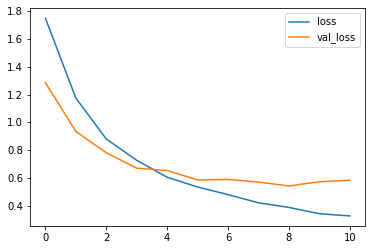

In [42]:
metrics = history.history
plt.plot(history.epoch, metrics['loss'],metrics['val_loss'])
plt.legend(['loss','val_loss'])
plt.show

In [43]:
# 모델 성능 평가
test_audio = []
test_labels = []
for audio, label in test_ds:
    test_audio.append(audio.numpy())
    test_labels.append(label.numpy())
test_audio = np.array(test_audio)
teset_labels = np.array(test_labels)

In [44]:
# 예측
model.predict(test_audio)
y_pred = np.argmax(model.predict(test_audio), axis = 1)
y_true = test_labels
test_acc = sum(y_pred == y_true)/len(y_true)
test_acc

25/25 [==============================] - 0s 7ms/step


0.85375

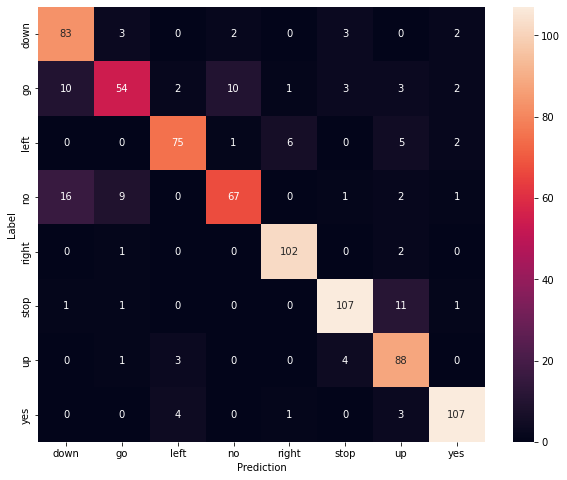

In [45]:
# 혼돈행렬을 이용해서 모델이 각 세트의 명령을 얼마나 잘 분류했는지 확인
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
            xticklabels=commands,
            yticklabels=commands,
            annot=True,fmt='g'
           )
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [46]:
# stop이라는 첫번째 사운드에 대해서 모델의 예측
# 0b40aa8e_nohash_0.wav
sample_file = data_dir/'stop/0b40aa8e_nohash_0.wav'

In [47]:
sample_ds = preprocess_dataset([str(sample_file)])

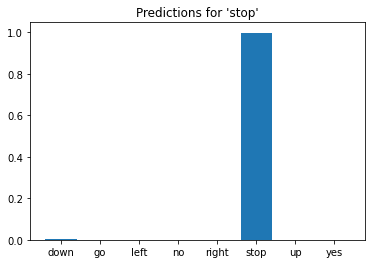

In [48]:
for spectrogram, label in sample_ds.batch(4):
    prediction = model(spectrogram)
    plt.bar(commands, tf.nn.softmax(prediction[0]))
    plt.title(f"Predictions for '{commands[label[0]]}'")
    plt.show()

In [49]:
sample_ds

<ParallelMapDataset element_spec=(TensorSpec(shape=(None, 129, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>